In [1]:
%pylab inline
import pandas as pd
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn import (datasets, decomposition, ensemble, manifold, random_projection)

Populating the interactive namespace from numpy and matplotlib


In [4]:
def describeData(data, names):
    description =  pd.DataFrame([[name, min(col), max(col), mean(col), std(col)] for name, col in zip(names, data.T)])
    description.columns = ["Name", "Min","Max", "Mean", "Std"]
    print description.head(len(names))
    
def normalize(data):
    return (data - data.min(0))/ (data.max(0) - data.min(0))

def tldcclass(d):
    tld = re.compile('.+\.(.+)$')
    ip = re.compile('^(\d{1,3})\.\d{1,3}\.\d{1,3}\.\d{1,3}')
    dd = []
    for l in d:
        if ip.match(l) != None:
            dd.append("ip:" + ip.match(l).group(1))
        elif tld.match(l) != None:
            dd.append("tld:" + tld.match(l).group(1))
        else:
            dd.append("intranet")
    return pd.Categorical.from_array(dd).codes

#data: podtawe dane
#show_data: te same dane na zmniejszonej liczbie wymiarow
def groupKmeans(data, show_data, display=False):
    km = KMeans().fit(data)
    labels = km.labels_
    print "Claser count: ", len(unique(labels))
    
    if display:
        colors = cm.rainbow(np.linspace(0, 1, len(unique(labels))))
        plt.figure(figsize=(10,10))
        plt.scatter(show_data[:, 0], show_data[:, 1], c= colors[labels])
        for i in xrange(len(unique(labels))):
            agent = show_data[labels == i][0]
            plt.text(agent[0], agent[1], str(i), color=colors[i], fontdict={'weight':'bold', 'size':50})
        show()
    return km

In [12]:
server_data = pd.read_csv('data2.gz', sep=';', header = None)
server_data.columns = ['date', 'month', 'day', 'dayofweek', 'hour', 'method', 'content', 'protocol', 'domain', 'code', 'size', 'target']
server_data['protocol'] = pd.Categorical.from_array(server_data['protocol']).codes
server_data['method'] = pd.Categorical.from_array(server_data['method']).codes

In [6]:
server_data.head(10)

,date,month,day,dayofweek,hour,method,content,protocol,domain,code,size,target
0,815854245,11,8,3,69045.0,0,/~macphed/finite/fe_resources/node16.html,-1,mffry.mines.edu,200,1413,2
1,815743836,11,7,2,45036.0,0,/dcs/courses/cai/html/introduction_lesson/desc...,6,enghouse.com,200,1520,2
2,812296001,9,28,4,53201.0,0,/mlookup/white.html,6,mac13.ee.umn.edu,200,511,2
3,812531958,10,1,0,29958.0,0,/~scottp/publish.html,-1,ix-bos6-07.ix.netcom.com,200,271,2
4,817730723,11,30,4,44723.0,0,/~scottp/index.html,-1,www.gnofn.org,200,1990,2
5,820322820,12,30,6,44820.0,0,/~macpherc/images/tspbadge.gif,-1,dd59-006.compuserve.com,200,3282,2
6,812575818,10,1,0,73818.0,0,/search/index.html,6,alf.usask.ca,200,1673,2
7,813597593,10,13,5,58793.0,0,/wcvm/picture.gif,6,wcvm7661.usask.ca,200,1295,2
8,818321925,12,7,4,31125.0,0,/~ladd/lsu.html,-1,prism.lib.auburn.edu,200,1093,2
9,816535726,11,16,4,59326.0,0,/~zhaok/image/icon/uslogo32.gif,-1,geolab10.usask.ca,200,1640,2


In [13]:
used_columns = ['date', 'hour', 'code', 'size', 'domain']

data = server_data[used_columns]
data['size'][data['size'] == '-'] = '0'
data['size'] =data['size'].astype('int32')

data['domain'] = tldcclass(data['domain'])

data_perm = data.sample(frac=1).reset_index(drop=True)
data_norm = normalize(data_perm.get_values())
data_scale = preprocessing.scale(data_perm, axis=0)

describeData(data_perm.get_values(), used_columns)
describeData(data_norm, used_columns)
describeData(data_scale, used_columns)

/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/pio/scratch/1/i248066/envs/my_root/lib/python2.7/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

     Name          Min          Max          Mean           Std
0    date  783002501.0  820450768.0  8.064732e+08  7.782984e+06
1    hour          0.0      86399.0  4.856911e+04  2.080223e+04
2    code        200.0        501.0  2.159664e+02  4.214503e+01
3    size          0.0   30193824.0  1.175115e+04  8.212976e+04
4  domain          0.0        181.0  5.969083e+01  5.255764e+01
     Name  Min  Max      Mean       Std
0    date  0.0  1.0  0.626751  0.207833
1    hour  0.0  1.0  0.562149  0.240769
2    code  0.0  1.0  0.053045  0.140017
3    size  0.0  1.0  0.000389  0.002720
4  domain  0.0  1.0  0.329784  0.290374
     Name       Min         Max          Mean  Std
0    date -3.015648    1.795908 -9.816418e-18  1.0
1    hour -2.334803    1.818550 -5.799095e-17  1.0
2    code -0.378845    6.763160  9.029411e-17  1.0
3    size -0.143080  367.492530 -6.374957e-19  1.0
4  domain -1.135721    2.308117 -3.225576e-17  1.0


NORMALIZED PCA


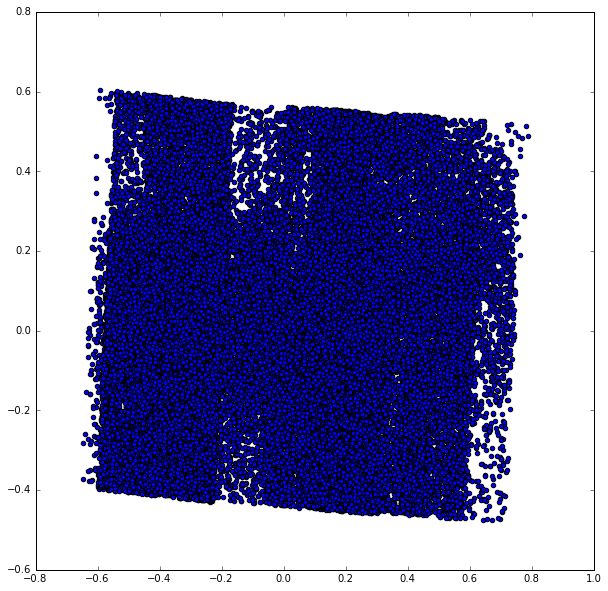

Standarized PCA


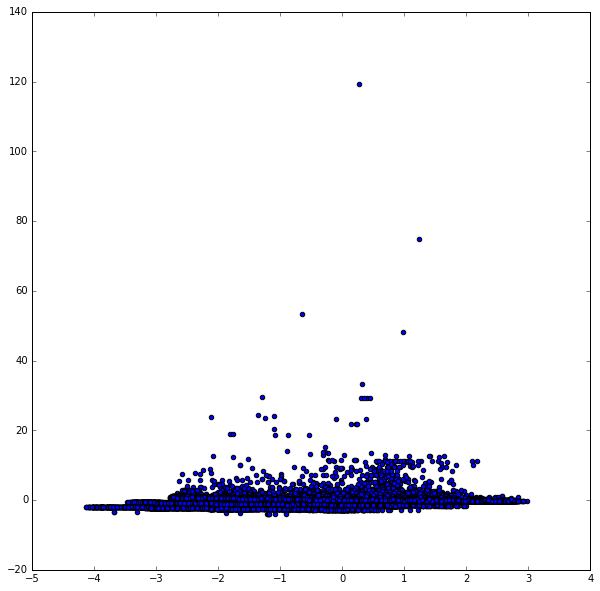

PCA


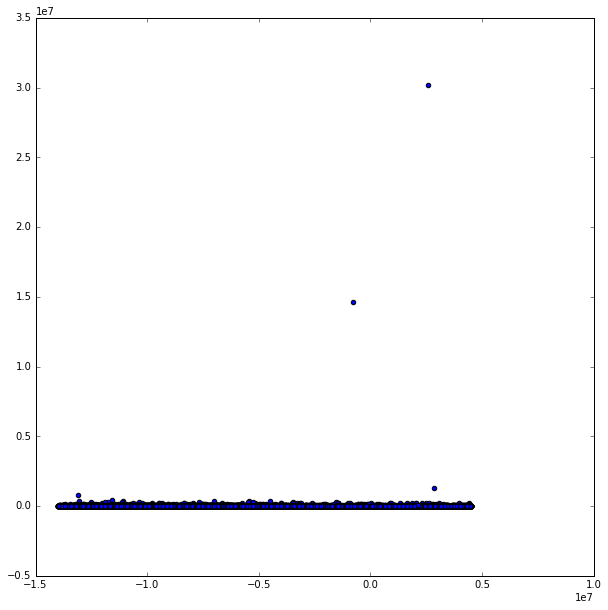

In [14]:
data_norm_pca = decomposition.PCA(n_components=2).fit_transform(data_norm)
data_scale_pca = decomposition.PCA(n_components=2).fit_transform(data_scale)
data_pca = decomposition.PCA(n_components=2).fit_transform(data)
print "NORMALIZED PCA"
plt.figure(figsize=(10,10))
plt.scatter(data_norm_pca[:100000,0], data_norm_pca[:100000, 1])
show()
print "Standarized PCA"
plt.figure(figsize=(10,10))
plt.scatter(data_scale_pca[:100000,0], data_scale_pca[:100000, 1])
show()
print "PCA"
plt.figure(figsize=(10,10))
plt.scatter(data_pca[:100000,0], data_pca[:100000, 1])
show()

NORMALIZED TSNE


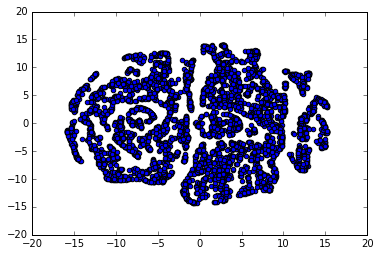

Standarized TSNE


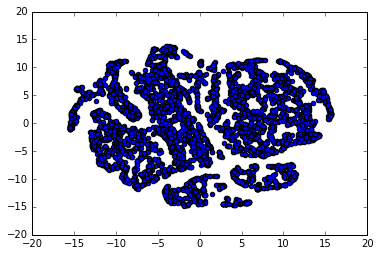

In [15]:
norm_tsne = data_norm[:5000]
scale_tsne = data_scale[:5000]

data_norm_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(norm_tsne)
data_scale_tsne = manifold.TSNE(n_components=2, init='pca').fit_transform(scale_tsne)
print "NORMALIZED TSNE"
plt.scatter(data_norm_tsne[:,0], data_norm_tsne[:, 1])
show()
print "Standarized TSNE"
plt.scatter(data_scale_tsne[:,0], data_scale_tsne[:, 1])
show()


Grupuje znormalizowane dane, wyswiedla na danych przepuszczonych przez pca
Claser count:  8


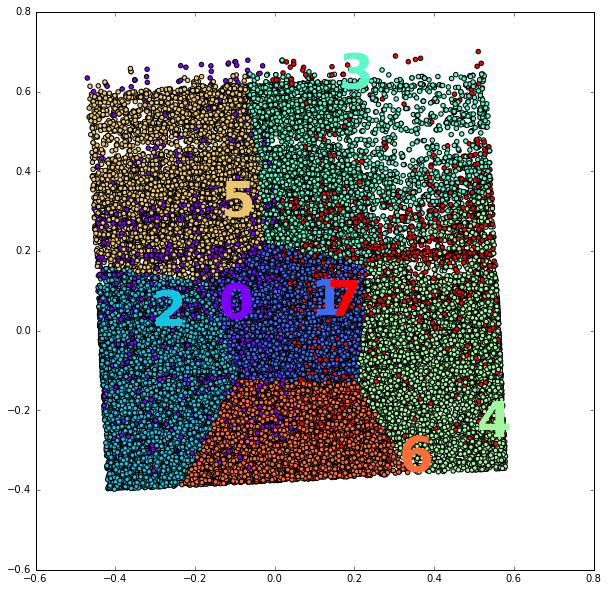

Grupuje ustandaryzowane dane, wyswiedla na danych przepuszczonych przez pca
Claser count:  8


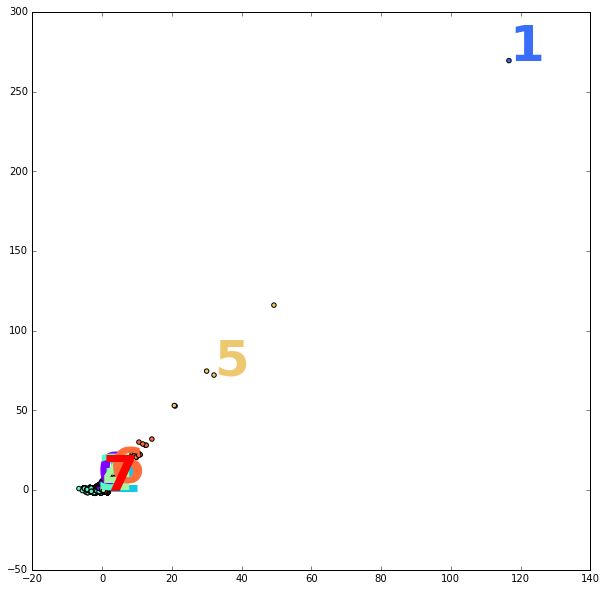

Grupuje znormalizowane dane, wyswiedla na danych przepuszczonych przez pca
Claser count:  8


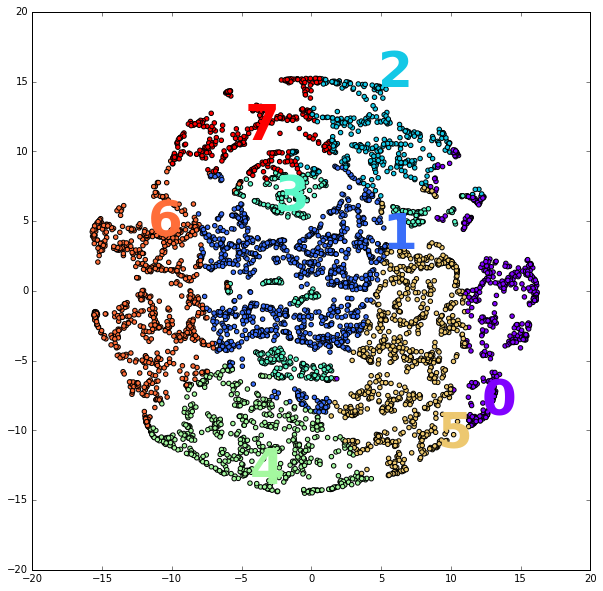

Grupuje ustandaryzowane dane, wyswiedla na danych przepuszczonych przez pca
Claser count:  8


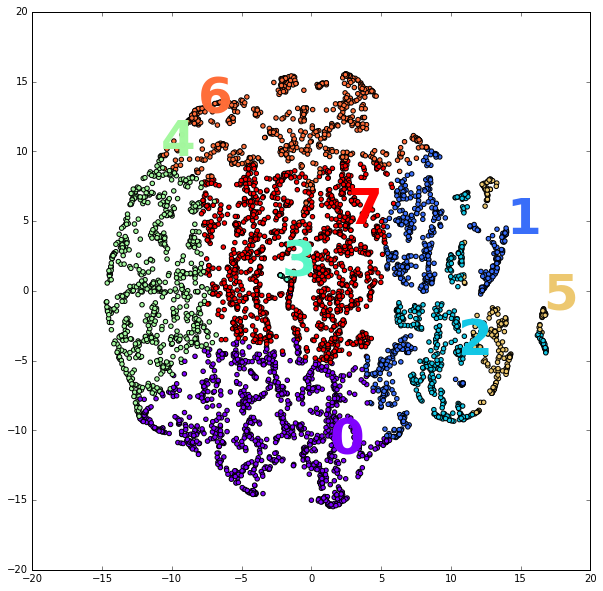

In [16]:
print "Grupuje znormalizowane dane, wyswiedla na danych przepuszczonych przez pca"
kmean_norm_pca = groupKmeans(data_norm[:100000], data_norm_pca[:100000], display=True)
print "Grupuje ustandaryzowane dane, wyswiedla na danych przepuszczonych przez pca"
kmean_scale_pca = groupKmeans(data_scale[:100000], data_scale_pca[:100000], display=True)
print "Grupuje znormalizowane dane, wyswiedla na danych przepuszczonych przez pca"
kmean_norm_tsne = groupKmeans(norm_tsne, data_norm_tsne, display=True)
print "Grupuje ustandaryzowane dane, wyswiedla na danych przepuszczonych przez pca"
kmean_scale_tsne = groupKmeans(scale_tsne, data_scale_tsne, display=True)